In [13]:
#importing the required libraries
import math 
import numpy as np
import random
import collections
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
#initialisations for the orignal version of algorithm
#dictionary and initial population


INT_MAX = 1000
dis = [[0]*20]*20
dis[0]  = [0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 150, INT_MAX, INT_MAX, 200, INT_MAX, 120, INT_MAX, INT_MAX]
dis[1]  = [INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 190, 400, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 130]
dis[2]  = [INT_MAX, INT_MAX, 0, 600, 220, 400, INT_MAX, INT_MAX, 200, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX]
dis[3]  = [INT_MAX, INT_MAX, 600, 0, INT_MAX, 210, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 300, INT_MAX, INT_MAX, INT_MAX]
dis[4]  = [INT_MAX, INT_MAX, 220, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, 180, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX]
dis[5]  = [INT_MAX, INT_MAX, 400, 210, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 370, 600, 260, 900]
dis[6]  = [150, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, 550, 180, INT_MAX, INT_MAX]
dis[7]  = [INT_MAX, 190, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, 560, INT_MAX, INT_MAX, INT_MAX, 170]
dis[8]  = [INT_MAX, 400, 200, INT_MAX, 180, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 600]
dis[9]  = [200, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 560, INT_MAX, 0, INT_MAX, 160, INT_MAX, 500]
dis[10] = [INT_MAX, INT_MAX, INT_MAX, 300, INT_MAX, 370, 550, INT_MAX, INT_MAX, INT_MAX, 0, INT_MAX, 240, INT_MAX]
dis[11] = [120, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 600, 180, INT_MAX, INT_MAX, 160, INT_MAX, 0, 400, INT_MAX]
dis[12] = [INT_MAX, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 260, INT_MAX, INT_MAX, INT_MAX, INT_MAX, 240, 400, 0, INT_MAX]
dis[13] = [INT_MAX, 130, INT_MAX, INT_MAX, INT_MAX, 900, INT_MAX, 170, 600, 500, INT_MAX, INT_MAX, INT_MAX, 0]


distances={}
s="abcdefghijklmn"
l1=[]
c=0
for i in range(len(s)):
    l1.append(s[i])

for x in l1:
    distances[x]={}
    c2=0
    for ele in l1:
#         distances[x][ele]=dis[c][c2]/10
        if (dis[c][c2]==1000):
            distances[x][ele]=dis[c][c2]
        else:
            distances[x][ele]=dis[c][c2]/10
            
        c2+=1
    c+=1
    





hibjaldcfmkgne
8723.0


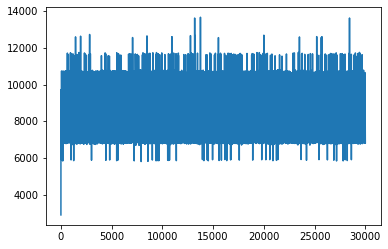

30000
2900.0


In [16]:
def reproduce_tsp(s1,s2):
    n=len(s1)
    
    list1=random.sample(range(0,n),2)
    list1.sort()
    
    sa=s1[list1[0]:list1[1]]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
    s=""
    j=0
    for i in range(0,list1[0]):
        s+=l2[j]
        j+=1
    
    for i in range(list1[0],list1[1]):
        s+=s1[i]
        
    for i in range(list1[1],n):
        s+=l2[j]
        j+=1
    
    return s
    

def mutate_tsp(s):
    idx_list=random.sample(range(0,len(s)),2)
    
    ans=""
    idx_list.sort()
    for i in range(len(s)):
        if (i==idx_list[0]):
            ans+=s[idx_list[1]]
        elif (i==idx_list[1]):
            ans+=s[idx_list[0]]
        else:
            ans+=s[i]
    return ans



def cost_function(s):
    cost=0
    for i in range(len(s)):
        j=(i+1)%(len(s))
        ele_i=s[i]
        ele_j=s[j]
        cost+=distances[ele_i][ele_j]
        
    return 15*INT_MAX-cost


def random_selection_tsp(population):
    n=len(population)
    #calculate fitness function value for each individual
    fitness_values=[]
    for i in range(n):
        fitness_values.append(cost_function(population[i]))
    return random.choices(population,weights=fitness_values,k=1)[0]



old_algo_tsp={}
population=["abcdefghijklmn" for i in range(20)]

def genetic_algo_tsp(population):
    x=30000
    gen_no=1
    
    while(x!=0):
        #taking care of the counter         
        x-=1
        
        #calculates the average fitness value of a generation
        n=len(population)
        average=-1
        for i in range(n):
            h=cost_function(population[i])
            average=max(average,h)
        
       
        old_algo_tsp[gen_no]=average
        
        gen_no+=1
        
        
        #the algorithm
        new_population=[]
        for i in range(n):
            s1=random_selection_tsp(population)
            s2=random_selection_tsp(population)
            s3=reproduce_tsp(s1,s2)
            #code for mutation goes here
            #for mutation, since it is rare lets benchmark
            #the peobablity to 0.1
            p=random.random()
            if (p>=0.4):
                new_population.append(mutate_tsp(s3))
            else:
                new_population.append(s3)
        population=new_population
        
    
    idx=-1
    f_val=-1
    for i in range(n):
        c=cost_function(population[i])
        if (f_val < c):
            f_val=c
            idx=i
            
    if(idx==-1):
        return ""
    return population[idx]



x1=genetic_algo_tsp(population)
print(x1)
print(cost_function(x1))
list_temp_x=[]
list_temp_y=[]
for i in old_algo_tsp.keys():
    list_temp_x.append(i)
    list_temp_y.append(old_algo_tsp[i])

x=np.array(list_temp_x)
y=np.array(list_temp_y)
plt.plot(x,y)
plt.show()
print(np.amax(x))
print(np.amin(y))


# print(cost_function("abcedfghijlmnk"))
    
        
        

In [ ]:
print(np.amax(y))

In [ ]:
def mutate_tsp_edited(s1):
    return mutate_tsp(s1)

def reproduce_tsp_edited(s1,s2):
    n=len(s1)
    
    list1=random.sample(range(0,n),3)
    
    list1.sort()
    
    
    list_ans=[]
    #creating the first kid
    sa=s1[0:list1[0]]
    
    l2=[]
    
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
            
    s=sa
    for i in range(len(l2)):
        s+=l2[i]
        
    list_ans.append(s)
    
    #creating the second child
    sa=s1[list1[0]:list1[1]]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
    s=""
    j=0
    for i in range(0,list1[0]):
        s+=l2[j]
        j+=1
    
    for i in range(list1[0],list1[1]):
        s+=s1[i]
        
    for i in range(list1[1],n):
        s+=l2[j]
        j+=1
        
    list_ans.append(s)
    
    #creating the third child
    sa=s1[list1[1]:list1[2]]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
    s=""
    j=0
    for i in range(0,list1[1]):
        s+=l2[j]
        j+=1
    
    for i in range(list1[1],list1[2]):
        s+=s1[i]
        
    for i in range(list1[2],n):
        s+=l2[j]
        j+=1
        
    list_ans.append(s)
    
    #creating the fourth child
    sa=s1[list1[2]:n]
    
    l2=[]
    for i in range(n):
        if (s2[i] in sa):
            continue
        else:
            l2.append(s2[i])
            
    s=""
    for i in range(len(l2)):
        s+=l2[i]
    s+=sa
    
    list_ans.append(s)
    
    return list_ans
        

new_algo_entries_tsp={}
possible_ans_2_tsp=[]
def ga_tsp_edited(population):
    x_counter=10000
    gen_no=1
    possible_ans_2_tsp.clear()
    flag=False
    
    while(x_counter!=0):
        #taking care of the counter
        x_counter-=1
        
        #calculating the best fitness value
        n=len(population)
        average=-1
        for i in range(n):
            h=cost_function(population[i])
            average=max(average,h)
            
        new_algo_entries_tsp[gen_no]=average
        gen_no+=1
        
        #the actual algoritm
        the_remaining_pop=[]
        new_population=[]
        for i in range(n):
            s1=random_selection_tsp(population)
            s2=random_selection_tsp(population)
            
            list1=reproduce_tsp_edited(s1,s2)
            
            child1=-1
            child2=-1
            f_val=-1
            
            for i in range(len(list1)):
                if(f_val < cost_function(list1[i])):
                    f_val=cost_function(list1[i])
                    child1=i
                    
            f_val=-1
            for i in range(len(list1)):
                if(i!=child1 and f_val<cost_function(list1[i])):
                    f_val=cost_function(list1[i])
                    child2=i
                    
            p=random.random()
            lt1=[]
            if(p>=0.1):
                lt1.append(mutate_tsp(list1[child1]))
                lt1.append(mutate_tsp(list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
                
            else:
                lt1.append((list1[child1]))
                lt1.append((list1[child2]))
                the_remaining_pop.append(lt1[1])
                new_population.append(lt1[0])
        
        cost_values=[]
        for i in range(n):
            cost_values.append(cost_function(the_remaining_pop[i]))
            
        x=random.choices(the_remaining_pop,weights=cost_values,k=5)
        new_population=new_population+x
        population=new_population
        
    
    idx=-1
    f_val=-1
    for i in range(len(population)):
        if (f_val < cost_function(population[i])):
            f_val=cost_function(population[i])
            idx=i
            
    return population[idx]


x1_new=ga_tsp_edited(population)
print(x1_new)
print(cost_function(x1_new))
list_temp_x_new=[]
list_temp_y_new=[]
for i in new_algo_entries_tsp.keys():
    list_temp_x_new.append(i)
    list_temp_y_new.append(new_algo_entries_tsp[i])

x_new=np.array(list_temp_x_new)
y_new=np.array(list_temp_y_new)
plt.plot(x_new,y_new)
plt.show()

